<a href="https://colab.research.google.com/github/junxnone/examples/blob/master/face/insightface/insightface_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip3 -q install insightface mxnet-cu100

In [0]:
import insightface
import urllib
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

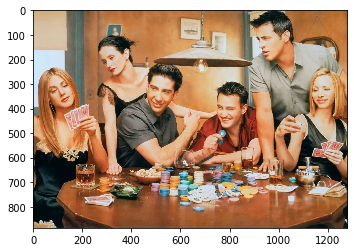

In [3]:
def url_to_image(url):
    resp = urllib.request.urlopen(url)
    image = np.asarray(bytearray(resp.read()), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image

url = 'https://github.com/deepinsight/insightface/blob/master/sample-images/t1.jpg?raw=true'
img = url_to_image(url)
rgbimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgbimg)

In [4]:
model = insightface.app.FaceAnalysis()
ctx_id = 0
model.prepare(ctx_id = ctx_id, nms=0.4)

[32, 16, 8] {'32': {'SCALES': (32, 16), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '16': {'SCALES': (8, 4), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}, '8': {'SCALES': (2, 1), 'BASE_SIZE': 16, 'RATIOS': (1.0,), 'ALLOWED_BORDER': 9999}}
use_landmarks True


In [5]:
faces = model.get(img)
for idx, face in enumerate(faces):
  print("Face [%d]:"%idx)
  print("\tage:%d"%(face.age))
  gender = 'Male'
  if face.gender==0:
    gender = 'Female'
  print("\tgender:%s"%(gender))
  print("\tembedding shape:%s"%face.embedding.shape)
  print("\tbbox:%s"%(face.bbox.astype(np.int).flatten()))
  print("\tlandmark:%s"%(face.landmark.astype(np.int).flatten()))
  print("")

Face [0]:
	age:25
	gender:Male
	embedding shape:512
	bbox:[ 903   52 1012  205]
	landmark:[917 120 948 116 921 149 937 174 958 169]

Face [1]:
	age:26
	gender:Female
	embedding shape:512
	bbox:[274 145 368 265]
	landmark:[290 210 319 195 305 230 315 246 339 234]

Face [2]:
	age:24
	gender:Female
	embedding shape:512
	bbox:[ 54 263 166 396]
	landmark:[ 85 329 130 305 121 341 114 371 150 352]

Face [3]:
	age:35
	gender:Male
	embedding shape:512
	bbox:[464 261 573 416]
	landmark:[490 321 541 332 505 366 483 369 531 378]

Face [4]:
	age:33
	gender:Male
	embedding shape:512
	bbox:[745 340 843 479]
	landmark:[759 397 801 402 769 430 765 436 806 440]

Face [5]:
	age:25
	gender:Female
	embedding shape:512
	bbox:[1130  266 1225  399]
	landmark:[1148  324 1192  323 1165  350 1153  366 1192  365]



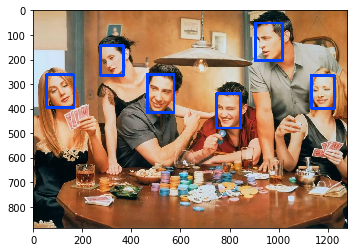

In [6]:
for idx, face in enumerate(faces):
  bbox = face.bbox.astype(np.int).flatten()
  cv2.rectangle(rgbimg, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0,64,255), 10)
plt.imshow(rgbimg)